<a href="https://colab.research.google.com/github/abhiv2003/feature-engineering-project/blob/main/feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CCMCA311: Feature Engineering Mini Project

* **Prepared by :** Abhishek Verma
* **Roll No.   :** 243301002

*(This notebook was prepared for the CCMCA311 group mini-project.)*

---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Yeh code aapke 'My Drive' folder ke andar
# sabhi files aur folders ke naam dikhayega.
!ls "/content/drive/My Drive/"

 CCMCA311_Project  'Documents '			  'MCA COLLEGE MATERIAL'
 Classroom	   'Government Job Preparation '


In [ ]:
# Yeh code 'CCMCA311_Project' folder ke andar
# ki saari files/folders dikhayega.
!ls "/content/drive/My Drive/CCMCA311_Project/"

feature_engineering.ipynb		 order_items.csv  website_pageviews.csv
maven_fuzzy_factory_data_dictionary.csv  orders.csv	  website_sessions.csv
order_item_refunds.csv			 products.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Set the Correct Base Path ---
# We remove the 'data/' folder from the path
# because your files are directly inside 'CCMCA311_Project'
base_path = "/content/drive/My Drive/CCMCA311_Project/"

print(f"Using base path: {base_path}")

# --- 2. Load all CSV Files ---
try:
    # Loading all the tables from your 'ls' output
    orders = pd.read_csv(base_path + "orders.csv")
    order_items = pd.read_csv(base_path + "order_items.csv")
    products = pd.read_csv(base_path + "products.csv")
    sessions = pd.read_csv(base_path + "website_sessions.csv")
    pageviews = pd.read_csv(base_path + "website_pageviews.csv")
    refunds = pd.read_csv(base_path + "order_item_refunds.csv")

    print("\nSUCCESS: All data files loaded successfully!")

except FileNotFoundError as e:
    print(f"\nERROR: File not found.")
    print(f"Details: {e}")

Using base path: /content/drive/My Drive/CCMCA311_Project/

SUCCESS: All data files loaded successfully!


In [ ]:
# Check the first 5 rows of the 'orders' table
orders.head()

,order_id,created_at,website_session_id,user_id,primary_product_id,items_purchased,price_usd,cogs_usd
0,1,2012-03-19 10:42:46,20,20,1,1,49.99,19.49
1,2,2012-03-19 19:27:37,104,104,1,1,49.99,19.49
2,3,2012-03-20 06:44:45,147,147,1,1,49.99,19.49
3,4,2012-03-20 09:41:45,160,160,1,1,49.99,19.49
4,5,2012-03-20 11:28:15,177,177,1,1,49.99,19.49


In [ ]:
# Check the first 5 rows of the 'sessions' table
sessions.head()

,website_session_id,created_at,user_id,is_repeat_session,utm_source,utm_campaign,utm_content,device_type,http_referer
0,1,2012-03-19 08:04:16,1,0,gsearch,nonbrand,g_ad_1,mobile,https://www.gsearch.com
1,2,2012-03-19 08:16:49,2,0,gsearch,nonbrand,g_ad_1,desktop,https://www.gsearch.com
2,3,2012-03-19 08:26:55,3,0,gsearch,nonbrand,g_ad_1,desktop,https://www.gsearch.com
3,4,2012-03-19 08:37:33,4,0,gsearch,nonbrand,g_ad_1,desktop,https://www.gsearch.com
4,5,2012-03-19 09:00:55,5,0,gsearch,nonbrand,g_ad_1,mobile,https://www.gsearch.com


In [ ]:
# --- Check for Missing Values in all tables ---

print("--- Missing Values Count ---")

print("\nOrders Table:")
print(orders.isnull().sum())

print("\nOrder Items Table:")
print(order_items.isnull().sum())

print("\nProducts Table:")
print(products.isnull().sum())

print("\nSessions Table:")
print(sessions.isnull().sum())

print("\nPageviews Table:")
print(pageviews.isnull().sum())

print("\nRefunds Table:")
print(refunds.isnull().sum())

--- Missing Values Count ---

Orders Table:
order_id              0
created_at            0
website_session_id    0
user_id               0
primary_product_id    0
items_purchased       0
price_usd             0
cogs_usd              0
dtype: int64

Order Items Table:
order_item_id      0
created_at         0
order_id           0
product_id         0
is_primary_item    0
price_usd          0
cogs_usd           0
dtype: int64

Products Table:
product_id      0
created_at      0
product_name    0
dtype: int64

Sessions Table:
website_session_id        0
created_at                0
user_id                   0
is_repeat_session         0
utm_source            83328
utm_campaign          83328
utm_content           83328
device_type               0
http_referer          39917
dtype: int64

Pageviews Table:
website_pageview_id    0
created_at             0
website_session_id     0
pageview_url           0
dtype: int64

Refunds Table:
order_item_refund_id    0
created_at              0
order_

In [ ]:
# --- Stage 1.1: Fix Missing Values ---
# We found missing data only in the 'sessions' table.
# We will fill the NaN (Not a Number) values with the string 'none'.
# This is a form of imputation, treating 'none' as a new category.

print("Fixing missing values in 'sessions' table...")

sessions['utm_source'] = sessions['utm_source'].fillna('none')
sessions['utm_campaign'] = sessions['utm_campaign'].fillna('none')
sessions['utm_content'] = sessions['utm_content'].fillna('none')
sessions['http_referer'] = sessions['http_referer'].fillna('none')

print("Missing values fixed.")

# --- Verification Step ---
# Let's check if the 'sessions' table is clean now.
print("\n--- Verifying 'sessions' table after fix ---")
print(sessions.isnull().sum())

Fixing missing values in 'sessions' table...
Missing values fixed.

--- Verifying 'sessions' table after fix ---
website_session_id    0
created_at            0
user_id               0
is_repeat_session     0
utm_source            0
utm_campaign          0
utm_content           0
device_type           0
http_referer          0
dtype: int64


In [ ]:
# --- Stage 1.2: Detect Duplicates ---

print("--- Checking for Full-Row Duplicates ---")

print(f"Orders table: {orders.duplicated().sum()} duplicates")
print(f"Order Items table: {order_items.duplicated().sum()} duplicates")
print(f"Products table: {products.duplicated().sum()} duplicates")
print(f"Sessions table: {sessions.duplicated().sum()} duplicates")
print(f"Pageviews table: {pageviews.duplicated().sum()} duplicates")
print(f"Refunds table: {refunds.duplicated().sum()} duplicates")

print("\n--- Checking for Duplicate IDs (Primary Keys) ---")
# IDs should always be unique. Let's check for duplicates in ID columns.
print(f"Orders table (order_id): {orders['order_id'].duplicated().sum()} duplicates")
print(f"Sessions table (website_session_id): {sessions['website_session_id'].duplicated().sum()} duplicates")
print(f"Products table (product_id): {products['product_id'].duplicated().sum()} duplicates")

--- Checking for Full-Row Duplicates ---
Orders table: 0 duplicates
Order Items table: 0 duplicates
Products table: 0 duplicates
Sessions table: 0 duplicates
Pageviews table: 0 duplicates
Refunds table: 0 duplicates

--- Checking for Duplicate IDs (Primary Keys) ---
Orders table (order_id): 0 duplicates
Sessions table (website_session_id): 0 duplicates
Products table (product_id): 0 duplicates


In [ ]:
# --- Stage 1.3: Detect Noisy Data ---
print("--- Checking for Noisy Data (Unrealistic Values) ---")

print("\n--- Orders Table ---")
# Check numeric values like price, items. They should not be negative.
# 'min' value par dhyaan dein.
print(orders[['price_usd', 'items_purchased', 'cogs_usd']].describe())

print("\n--- Order Items Table ---")
# Check numeric values. Price should not be negative.
# 'min' value par dhyaan dein.
print(order_items[['price_usd', 'cogs_usd']].describe())

print("\n--- Refunds Table ---")
# Check refund amount. Should not be negative.
# 'min' value par dhyaan dein.
print(refunds[['refund_amount_usd']].describe())

print("\n--- Sessions Table ---")
# Check categorical values for weird entries (jaise 'm0bile')
print("\nUnique Device Types (should be mobile/desktop):")
print(sessions['device_type'].unique())

# Check boolean (0/1) values
print("\nUnique 'Is Repeat Session' values (should be 0 or 1):")
print(sessions['is_repeat_session'].unique())

--- Checking for Noisy Data (Unrealistic Values) ---

--- Orders Table ---
          price_usd  items_purchased      cogs_usd
count  32313.000000     32313.000000  32313.000000
mean      59.991636         1.238666     22.355406
std       17.808771         0.426274      6.238621
min       29.990000         1.000000      9.490000
25%       49.990000         1.000000     19.490000
50%       49.990000         1.000000     19.490000
75%       59.990000         1.000000     22.490000
max      109.980000         2.000000     41.980000

--- Order Items Table ---
          price_usd      cogs_usd
count  40025.000000  40025.000000
mean      48.432473     18.047976
std        8.012370      3.856821
min       29.990000      9.490000
25%       49.990000     19.490000
50%       49.990000     19.490000
75%       49.990000     19.490000
max       59.990000     22.490000

--- Refunds Table ---
       refund_amount_usd
count        1731.000000
mean           49.300225
std             4.956015
min       

Plotting box plots to detect outliers...

Saved 'outliers_orders.png'
Saved 'outliers_order_items.png'
Saved 'outliers_refunds.png'

All plots saved. Please check the images.


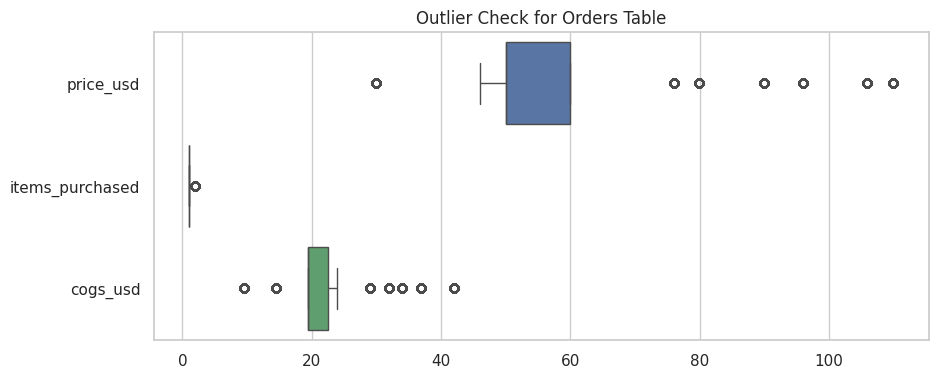

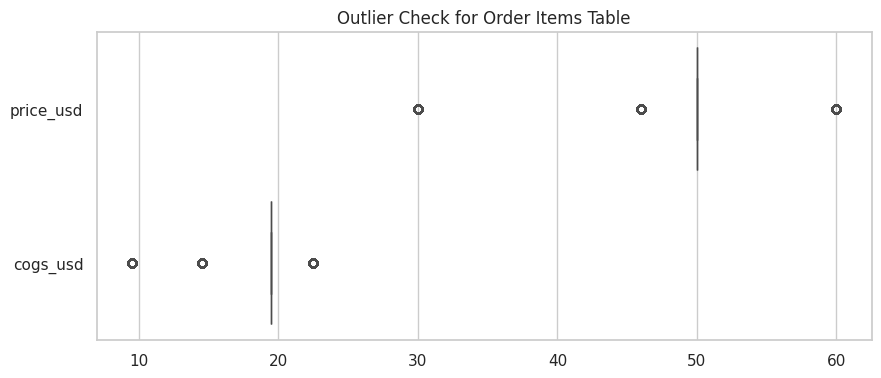

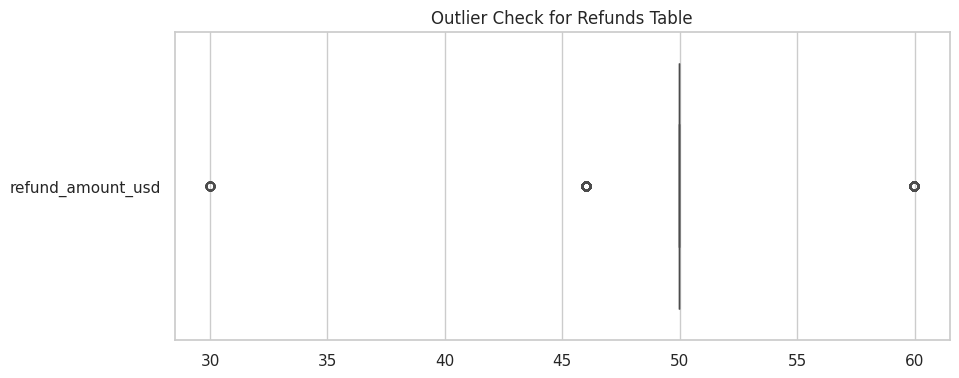

In [ ]:
# --- Stage 1.4: Detect Outliers using Box Plots ---

# Set up the plotting style
sns.set(style="whitegrid")
print("Plotting box plots to detect outliers...")

# --- Plot 1: Orders Table ---
plt.figure(figsize=(10, 4))
plt.title('Outlier Check for Orders Table')
sns.boxplot(data=orders[['price_usd', 'items_purchased', 'cogs_usd']], orient='h')
plt.savefig('outliers_orders.png') # Save the plot as an image
print("\nSaved 'outliers_orders.png'")

# --- Plot 2: Order Items Table ---
plt.figure(figsize=(10, 4))
plt.title('Outlier Check for Order Items Table')
sns.boxplot(data=order_items[['price_usd', 'cogs_usd']], orient='h')
plt.savefig('outliers_order_items.png') # Save the plot as an image
print("Saved 'outliers_order_items.png'")

# --- Plot 3: Refunds Table ---
plt.figure(figsize=(10, 4))
plt.title('Outlier Check for Refunds Table')
sns.boxplot(data=refunds[['refund_amount_usd']], orient='h')
plt.savefig('outliers_refunds.png') # Save the plot as an image
print("Saved 'outliers_refunds.png'")

print("\nAll plots saved. Please check the images.")

In [ ]:
# --- Stage 2: Data Integration ---
print("--- Stage 2: Data Integration ---")

# Hum 6 tables se data ko join karna shuru kar rahe hain.
# Step 1: 'orders' table ko 'order_items' table se join karein.
# Hum 'order_id' column par join karenge, kyunki yeh dono tables mein common hai.

print(f"Orders table mein rows: {len(orders)}")
print(f"Order Items table mein rows: {len(order_items)}")

# 'inner' join ka matlab hai - sirf woh rows rakho jo dono tables mein match hoti hain.
order_full = pd.merge(orders,
                      order_items,
                      on='order_id',
                      how='inner',
                      suffixes=('_order', '_item')) # Agar columns ke naam same hain, toh unhe naya naam dein

print(f"Nayi 'order_full' table mein rows: {len(order_full)}")
print("\nJoin successful. Nayi table ki pehli 5 rows:")

# Nayi judi hui table ka .head() dekhein
# Ismein orders aur order_items, dono ke columns hone chahiye.
order_full.head()

--- Stage 2: Data Integration ---
Orders table mein rows: 32313
Order Items table mein rows: 40025
Nayi 'order_full' table mein rows: 40025

Join successful. Nayi table ki pehli 5 rows:


,order_id,created_at_order,website_session_id,user_id,primary_product_id,items_purchased,price_usd_order,cogs_usd_order,order_item_id,created_at_item,product_id,is_primary_item,price_usd_item,cogs_usd_item
0,1,2012-03-19 10:42:46,20,20,1,1,49.99,19.49,1,2012-03-19 10:42:46,1,1,49.99,19.49
1,2,2012-03-19 19:27:37,104,104,1,1,49.99,19.49,2,2012-03-19 19:27:37,1,1,49.99,19.49
2,3,2012-03-20 06:44:45,147,147,1,1,49.99,19.49,3,2012-03-20 06:44:45,1,1,49.99,19.49
3,4,2012-03-20 09:41:45,160,160,1,1,49.99,19.49,4,2012-03-20 09:41:45,1,1,49.99,19.49
4,5,2012-03-20 11:28:15,177,177,1,1,49.99,19.49,5,2012-03-20 11:28:15,1,1,49.99,19.49


In [ ]:
# --- Stage 2: Data Integration (Step 2) ---
print("--- Joining 'order_full' with 'products' table ---")

# We will join our 'order_full' table with the 'products' table.
# The common key is 'product_id'.
final_data = pd.merge(order_full,
                      products,
                      on='product_id',
                      how='inner',
                      suffixes=('_order', '_product')) # Add suffixes just in case

print(f"Rows in 'order_full' table: {len(order_full)}")
print(f"Rows in 'products' table: {len(products)}")
print(f"Rows in new 'final_data' table: {len(final_data)}")

print("\nSecond join successful. Final table's first 5 rows:")

# Let's check the new table.
# It should have all previous columns PLUS 'product_name'
final_data.head()

--- Joining 'order_full' with 'products' table ---
Rows in 'order_full' table: 40025
Rows in 'products' table: 4
Rows in new 'final_data' table: 40025

Second join successful. Final table's first 5 rows:


,order_id,created_at_order,website_session_id,user_id,primary_product_id,items_purchased,price_usd_order,cogs_usd_order,order_item_id,created_at_item,product_id,is_primary_item,price_usd_item,cogs_usd_item,created_at,product_name
0,1,2012-03-19 10:42:46,20,20,1,1,49.99,19.49,1,2012-03-19 10:42:46,1,1,49.99,19.49,2012-03-19 08:00:00,The Original Mr. Fuzzy
1,2,2012-03-19 19:27:37,104,104,1,1,49.99,19.49,2,2012-03-19 19:27:37,1,1,49.99,19.49,2012-03-19 08:00:00,The Original Mr. Fuzzy
2,3,2012-03-20 06:44:45,147,147,1,1,49.99,19.49,3,2012-03-20 06:44:45,1,1,49.99,19.49,2012-03-19 08:00:00,The Original Mr. Fuzzy
3,4,2012-03-20 09:41:45,160,160,1,1,49.99,19.49,4,2012-03-20 09:41:45,1,1,49.99,19.49,2012-03-19 08:00:00,The Original Mr. Fuzzy
4,5,2012-03-20 11:28:15,177,177,1,1,49.99,19.49,5,2012-03-20 11:28:15,1,1,49.99,19.49,2012-03-19 08:00:00,The Original Mr. Fuzzy


In [ ]:
# --- Stage 3: Data Transformation ---
print("--- Stage 3: Data Transformation ---")

print("\n--- 'final_data' Table Info (Data Types) ---")
# .info() humein har column ka type (object, int, float)
# aur non-null count batata hai.
final_data.info()

print("\n\n--- 'sessions' Table Info (Data Types) ---")
sessions.info()

--- Stage 3: Data Transformation ---

--- 'final_data' Table Info (Data Types) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40025 entries, 0 to 40024
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            40025 non-null  int64  
 1   created_at_order    40025 non-null  object 
 2   website_session_id  40025 non-null  int64  
 3   user_id             40025 non-null  int64  
 4   primary_product_id  40025 non-null  int64  
 5   items_purchased     40025 non-null  int64  
 6   price_usd_order     40025 non-null  float64
 7   cogs_usd_order      40025 non-null  float64
 8   order_item_id       40025 non-null  int64  
 9   created_at_item     40025 non-null  object 
 10  product_id          40025 non-null  int64  
 11  is_primary_item     40025 non-null  int64  
 12  price_usd_item      40025 non-null  float64
 13  cogs_usd_item       40025 non-null  float64
 14  created_at         

In [ ]:
# --- Stage 3: Data Transformation ---
from sklearn.preprocessing import StandardScaler
import pandas as pd

print("--- 3.1: Transforming Date Columns (Type Conversion) ---")
# 'object' (text) ko 'datetime' format mein badalna

try:
    final_data['created_at_order'] = pd.to_datetime(final_data['created_at_order'])
    sessions['created_at'] = pd.to_datetime(sessions['created_at'])
    print("SUCCESS: Date columns converted to datetime.")
except Exception as e:
    print(f"ERROR converting dates: {e}")


print("\n--- 3.2: Encoding Categorical Data (One-Hot Encoding) ---")
# PDF Task: Encoding categorical data
# Hum 'sessions' table mein 'device_type' column ko encode karenge.
# 'mobile' -> [0, 1]
# 'desktop' -> [1, 0]
#
print(f"Original unique devices: {sessions['device_type'].unique()}")

# 'get_dummies' One-Hot Encoding karne ka sabse aasan tareeka hai
device_dummies = pd.get_dummies(sessions['device_type'], prefix='device', drop_first=False)

# In naye columns ('device_desktop', 'device_mobile') ko 'sessions' table mein jodna
sessions = pd.concat([sessions, device_dummies], axis=1)

print("SUCCESS: 'device_type' encoded. New columns added:")
print(sessions[['device_type', 'device_desktop', 'device_mobile']].head())


print("\n--- 3.3: Standardization (Z-score Scaling) ---")
# PDF Task: Normalization & Standardization
# Hum 'final_data' table mein 'price_usd_order' ko scale karenge.
#
scaler = StandardScaler()

# Scaler ko 2D array chahiye, isliye [['column_name']] ka upyog karein
price_data = final_data[['price_usd_order']]

# 'fit_transform' naye scaled values ko calculate karta hai
final_data['price_scaled'] = scaler.fit_transform(price_data)

print("SUCCESS: 'price_usd_order' scaled.")
# Scaled data ka mean lagbhag 0 aur std dev 1 hoga
print(final_data[['price_usd_order', 'price_scaled']].describe())


print("\n--- 3.4: Discretization (Binning) ---")
# PDF Task: Discretization (continuous to categories) [cite: 22]
# Hum order ke time (hour) ko categories (Morning, Afternoon, etc.) mein badalenge.

# Pehle, 'created_at_order' se 'order_hour' nikaalein (Feature Creation)
final_data['order_hour'] = final_data['created_at_order'].dt.hour

# Ab 'order_hour' (0-23) ko bins mein daalein
# Bins: 0-6 (Night), 7-12 (Morning), 13-18 (Afternoon), 19-23 (Evening)
bins = [-1, 6, 12, 18, 23]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']

final_data['time_of_day'] = pd.cut(final_data['order_hour'], bins=bins, labels=labels, right=True)

print("SUCCESS: 'order_hour' ko 'time_of_day' categories mein badal diya.")
print(final_data[['order_hour', 'time_of_day']].head(10))

--- 3.1: Transforming Date Columns (Type Conversion) ---
SUCCESS: Date columns converted to datetime.

--- 3.2: Encoding Categorical Data (One-Hot Encoding) ---
Original unique devices: ['mobile' 'desktop']
SUCCESS: 'device_type' encoded. New columns added:
  device_type  device_desktop  device_mobile
0      mobile           False           True
1     desktop            True          False
2     desktop            True          False
3     desktop            True          False
4      mobile           False           True

--- 3.3: Standardization (Z-score Scaling) ---
SUCCESS: 'price_usd_order' scaled.
       price_usd_order  price_scaled
count     40025.000000  4.002500e+04
mean         65.629269  4.885481e-16
std          20.323782  1.000012e+00
min          29.990000 -1.753597e+00
25%          49.990000 -7.695155e-01
50%          49.990000 -7.695155e-01
75%          79.980000  7.061141e-01
max         109.980000  2.182236e+00

--- 3.4: Discretization (Binning) ---
SUCCESS: 'order_h

In [ ]:
# --- Stage 4.1: Remove Unnecessary Attributes ---
print(f"Original number of columns in final_data: {len(final_data.columns)}")

# Columns to drop (IDs and redundant columns)
columns_to_drop = [
    'order_id',           # ID
    'website_session_id', # ID
    'user_id',            # ID
    'order_item_id',      # ID
    'product_id',         # ID
    'primary_product_id', # Redundant ID
    'created_at_order',   # Transformed into time_of_day
    'created_at_item',    # Redundant date
    'created_at',         # Redundant date
    'order_hour'          # Transformed into time_of_day
]

# Use .drop() to remove them
data_reduced = final_data.drop(columns=columns_to_drop)

print(f"Columns dropped. New number of columns: {len(data_reduced.columns)}")

print("\n--- New 'data_reduced' table columns ---")
# Check the remaining columns
print(data_reduced.info())

Original number of columns in final_data: 19
Columns dropped. New number of columns: 9

--- New 'data_reduced' table columns ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40025 entries, 0 to 40024
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   items_purchased  40025 non-null  int64   
 1   price_usd_order  40025 non-null  float64 
 2   cogs_usd_order   40025 non-null  float64 
 3   is_primary_item  40025 non-null  int64   
 4   price_usd_item   40025 non-null  float64 
 5   cogs_usd_item    40025 non-null  float64 
 6   product_name     40025 non-null  object  
 7   price_scaled     40025 non-null  float64 
 8   time_of_day      40025 non-null  category
dtypes: category(1), float64(5), int64(2), object(1)
memory usage: 2.5+ MB
None



--- Generating Correlation Heatmap ---
Saved 'correlation_heatmap.png'


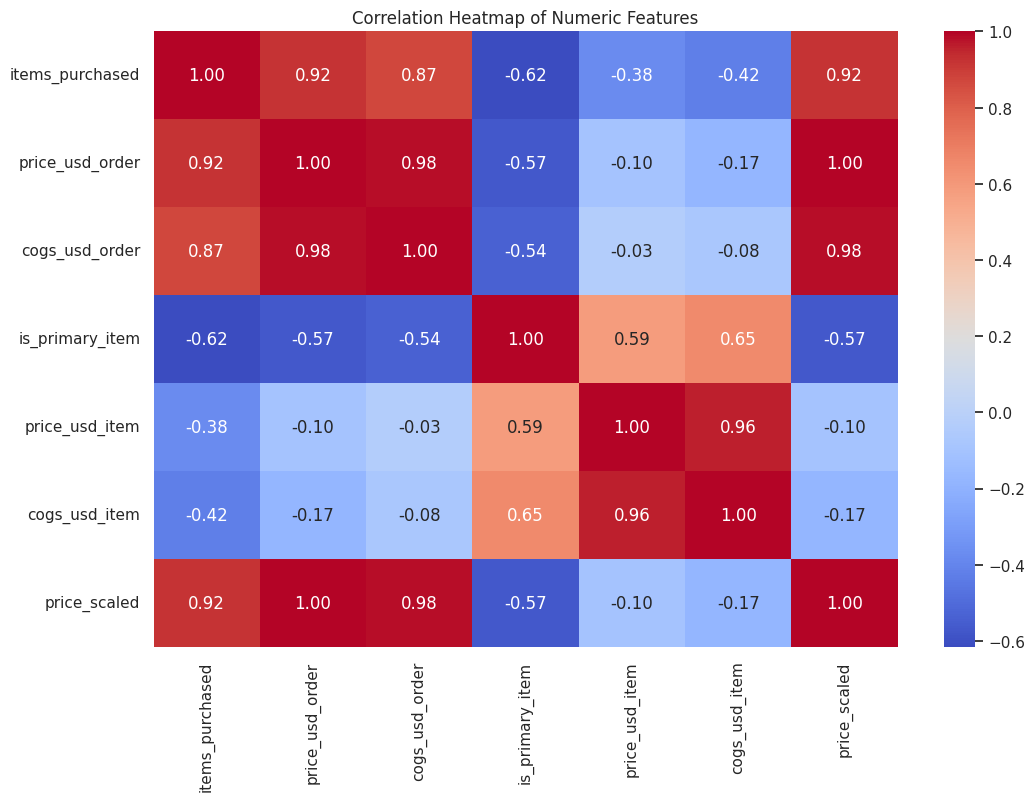

In [ ]:
# --- Stage 4.2: Correlation Analysis ---
print("\n--- Generating Correlation Heatmap ---")

# Select only the numeric columns for the correlation matrix
numeric_data = data_reduced.select_dtypes(include=[np.number])

# Calculate the correlation
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.savefig('correlation_heatmap.png')
print("Saved 'correlation_heatmap.png'")

In [ ]:
# --- Stage 4.3: Treating High Correlation ---
# PDF Task: Drop highly related features
print(f"Number of columns before correlation drop: {len(data_reduced.columns)}")

# Columns to drop based on heatmap analysis:
# 1. 'cogs_usd_order' (0.98 correlation with price_usd_order)
# 2. 'cogs_usd_item' (0.96 correlation with price_usd_item)
# 3. 'price_usd_order' (1.00 correlation with price_scaled, we keep the scaled version)
final_cleaned_data = data_reduced.drop(columns=[
    'cogs_usd_order',
    'cogs_usd_item',
    'price_usd_order'
])

print(f"Number of columns after correlation drop: {len(final_cleaned_data.columns)}")

print("\n--- Final Cleaned Dataset ---")
print("These are the final features for our project:")
final_cleaned_data.head()

Number of columns before correlation drop: 9
Number of columns after correlation drop: 6

--- Final Cleaned Dataset ---
These are the final features for our project:


,items_purchased,is_primary_item,price_usd_item,product_name,price_scaled,time_of_day
0,1,1,49.99,The Original Mr. Fuzzy,-0.769515,Morning
1,1,1,49.99,The Original Mr. Fuzzy,-0.769515,Evening
2,1,1,49.99,The Original Mr. Fuzzy,-0.769515,Night
3,1,1,49.99,The Original Mr. Fuzzy,-0.769515,Morning
4,1,1,49.99,The Original Mr. Fuzzy,-0.769515,Morning
